In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv = pd.read_csv('HW2_data.csv')

In [2]:
csv = csv.sort_values(by=['0'])
rows , _ = csv.shape

In [3]:
filed = pd.DataFrame(columns=['Name'])
saved_name = ""
column_list = list(filed.columns)
people_counter = -1
for index in range(rows):
    extract = csv.iloc[index]
    if saved_name != extract['0']:
        saved_name = extract['0']
        filed = filed.append({'Name':saved_name},ignore_index=True)
        people_counter += 1
    if extract['1'] not in column_list:
        filed[extract['1']] = ""
        column_list = list(filed.columns)
    filed.at[people_counter,extract['1']] = extract['2']

In [4]:
filed_rows , _ = filed.shape

In [5]:
big_list = [[0,0,0,""],[0,0,0,""],[0,0,0,""],[0,0,0,""],[0,0,0,""]] # num_of_people , total_value , Max_value , Max_People
M_Height = []
M_Weight = []
F_Height = []
F_Weight = []
age_bar = []
Male = 0
travel_columns = ["Height","Age","Weight","HR","BP"]
for index in range(filed_rows):
    Gender = filed.iloc[index]['Sex']
    if Gender == 'M':
        Male += 1
    for travel_index in range(len(travel_columns)):
        if filed.at[index,travel_columns[travel_index]] is not np.nan:
            t_value = int(filed.at[index,travel_columns[travel_index]])
            big_list[travel_index][0] += 1
            big_list[travel_index][1] += t_value
            if big_list[travel_index][2] < t_value:
                big_list[travel_index][2] = t_value
                big_list[travel_index][3] = filed.iloc[index]['Name']
    if Gender == 'M' and filed.iloc[index]["Height"] is not np.nan and filed.iloc[index]["Weight"] is not np.nan:   # the weight and height will not add to the list if one of the data is missing
        M_Height.append(int(filed.iloc[index]["Height"]))
        M_Weight.append(int(filed.iloc[index]["Weight"]))
    elif Gender == 'F' and filed.iloc[index]["Height"] is not np.nan and filed.iloc[index]["Weight"] is not np.nan:
        F_Height.append(int(filed.iloc[index]["Height"]))
        F_Weight.append(int(filed.iloc[index]["Weight"]))
    if filed.iloc[index]['Age'] is not np.nan:
        target = int((int(filed.iloc[index]['Age'])-1)/10)
        if len(age_bar) < target+1:
            age_bar.extend([0]*(target+1-len(age_bar)))
        age_bar[target] += 1

In [6]:
filed.at[filed_rows,['Name']] = '"Average"'
for travel_index in range(len(travel_columns)):
    filed.at[filed_rows,travel_columns[travel_index]] = float(big_list[travel_index][1] / big_list[travel_index][0])
    print("%10s has largest %10s value of %4d"%(big_list[travel_index][3],travel_columns[travel_index],big_list[travel_index][2]))

     Mason has largest     Height value of  186
   Madison has largest        Age value of   74
     Jacob has largest     Weight value of   76
      Liam has largest         HR value of   94
     Lucas has largest         BP value of  148


In [7]:
filed

,Name,Height,Age,Sex,Weight,HR,BP
0,Abigail,161,46,F,56,87,119
1,Aiden,166,38,M,69,93,136
2,Alexander,171,43,M,62,66,124
3,Amelia,151,66,F,49,NaN,119
4,Aria,170,55,F,59,81,127
5,Ava,165,70,F,63,66,NaN
6,Avery,159,66,F,54,72,121
7,Benjamin,164,39,M,68,72,122
8,Camila,166,44,F,46,NaN,134
9,Charlotte,NaN,65,F,NaN,82,92


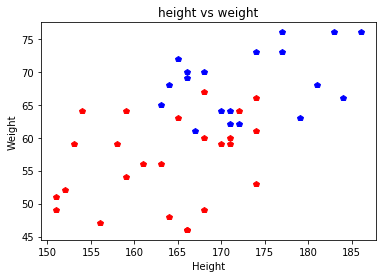

In [8]:
fig , ax = plt.subplots()
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("height vs weight")
ax.plot(M_Height,M_Weight,'bp',F_Height,F_Weight,'rp')
# explained in the cell 6 which will not show the point if any data is missed

([<matplotlib.patches.Wedge at 0x7fb5d4aff2b0>,
 [Text(1.09783,0.0690696,'1-10'),
  Text(0.99531,0.468357,'11-20'),
  Text(0.646564,0.889919,'21-30'),
  Text(-0.206119,1.08052,'31-40'),
  Text(-1.09783,0.0690696,'41-50'),
  Text(-0.529929,-0.963937,'51-60'),
  Text(0.701166,-0.847565,'61-70'),
  Text(1.09783,-0.0690696,'71-80')])

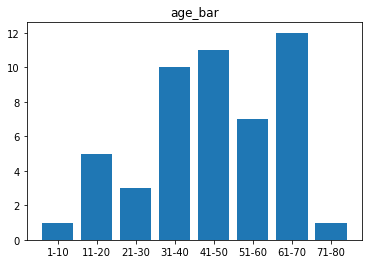

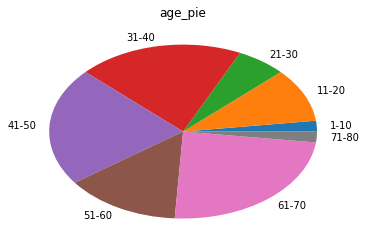

In [9]:
fig , ax = plt.subplots()
plt.title("age_bar")
ax.bar([str("{}-{}".format(x,x+9)) for x in range(1,len(age_bar)*10+1,10)],age_bar)
fig , ax = plt.subplots()
plt.title("age_pie")
ax.pie(age_bar,labels=[str("{}-{}".format(x,x+9)) for x in range(1,len(age_bar)*10+1,10)])


([<matplotlib.patches.Wedge at 0x7fb5d4a75438>,
 [Text(0.339919,1.04616,'Male'), Text(-0.339919,-1.04616,'Female')])

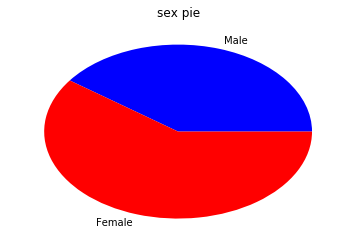

In [10]:
fig , ax = plt.subplots()
plt.title("sex pie")
ax.pie([Male/filed_rows,(filed_rows-Male)/filed_rows],labels=['Male','Female'],colors=['b','r'])